<a href="https://colab.research.google.com/github/Muskan07m/BreastCancer-Detection/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.environ["KAGGLE_USERNAME"] = "muskankumari200407"
os.environ["KAGGLE_KEY"] ="331a9f6b9cb6809388289cf031f2e88b"
!kaggle datasets download nancyalaswad90/breast-cancer-dataset

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 84.4MB/s]


In [ ]:
!unzip breast-cancer-dataset.zip

Archive:  breast-cancer-dataset.zip
  inflating: data.csv                


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,  Conv2D,Flatten , Dropout ,MaxPool2D,Dense,Conv1D,MaxPool1D
from tensorflow.keras.models import Model,Sequential
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
data=pd.read_csv("data.csv")


# New Section

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data=data.drop(columns=['id'])

In [ ]:
#Renaming of diagnosis into labels
data=data.rename(columns={'diagnosis' : 'labels'})
data.head()

,labels,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# WE RENAME MALIGNANT(M)as 1 OR BENIGN(B) as 0
data['labels']=data['labels'].map({'M':1, 'B':0})
data.head()

,labels,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Corelation of labels with other factors of data

v=data.corr()
v.iloc[0].sort_values(axis=0,ascending=True)

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave_points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave_points_mean        0

In [ ]:
# Remove columns which has low correlation value with labels
cols = [
'fractal_dimension_se',
'smoothness_se',
'fractal_dimension_mean',
'texture_se',
'symmetry_se']

high = data.drop(cols, axis=1)
high.head(2)


,labels,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [ ]:
x=high.drop(columns=['labels'])

In [ ]:
y=high['labels']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: labels, Length: 569, dtype: int64

In [ ]:
# Normalization of x

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
x_train.shape

(455, 25)

In [ ]:
y_train.shape

(455,)

In [ ]:
X_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)

In [ ]:
X_train.shape

(455, 25, 1)

In [ ]:
X_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
X_test.shape

(114, 25, 1)

In [ ]:
y_train.shape

(455,)

In [ ]:
y_test.shape

(114,)

In [ ]:
# MODEL PREPARATION USING CNN
model=tf.keras.Sequential()
#Add convolution Layer-it will apply convolutional operation
model.add(Conv1D(filters=32,kernel_size=3,activation="relu" ,input_shape=(25,1)))

#Add Max Pooling Layer
model.add(MaxPool1D())

# Again adding convolutional and Pooling layers
model.add(Conv1D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool1D())
model.add(Dropout(0.2))

model.add(Conv1D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool1D())
#FCN-Fully Connected Network

model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))


#Output Layer
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


In [ ]:

project=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
15/15 [==============================] - 2s 21ms/step - loss: 0.5803 - accuracy: 0.8681 - val_loss: 0.3975 - val_accuracy: 0.8947
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.3221 - accuracy: 0.9099 - val_loss: 0.2144 - val_accuracy: 0.9211
Epoch 3/20
15/15 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.9209 - val_loss: 0.1822 - val_accuracy: 0.9211
Epoch 4/20
15/15 [==============================] - 0s 7ms/step - loss: 0.1760 - accuracy: 0.9429 - val_loss: 0.1630 - val_accuracy: 0.9211
Epoch 5/20
15/15 [==============================] - 0s 6ms/step - loss: 0.1471 - accuracy: 0.9516 - val_loss: 0.1527 - val_accuracy: 0.9386
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.1233 - accuracy: 0.9538 - val_loss: 0.1453 - val_accuracy: 0.9211
Epoch 7/20
15/15 [==============================] - 0s 6ms/step - loss: 0.1051 - accuracy: 0.9648 - val_loss: 0.1537 - val_accuracy: 0.9298
Epoch 8/20
15/15 [=

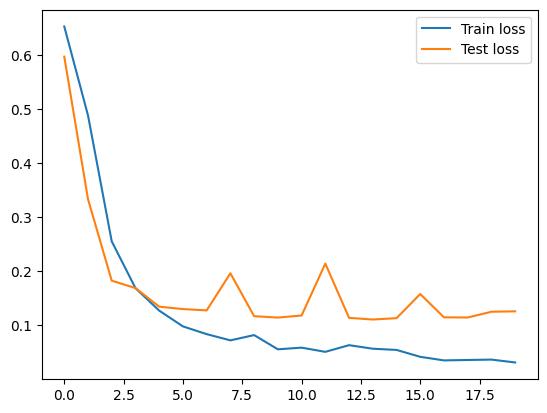

In [ ]:
plt.plot(project.history["loss"] ,label="Train loss")
plt.plot(project.history["val_loss"] ,label="Test loss")
plt.legend()
plt.show()

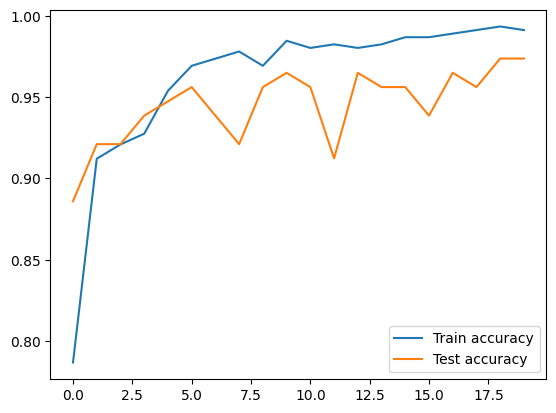

In [ ]:
plt.plot(project.history['accuracy'],label="Train accuracy")
plt.plot(project.history["val_accuracy"] ,label="Test accuracy")
plt.legend()
plt.show()

In [ ]:
y_test=y_test.reset_index()

In [ ]:
y_test=y_test.drop(['index'],axis=1)

In [ ]:
y_test

,labels
0,0
1,1
2,1
3,0
4,0
...,...
109,0
110,0
111,1
112,1


In [ ]:
np.where(y_test==1)[0]


array([  1,   2,   6,  17,  22,  24,  29,  30,  39,  40,  42,  44,  45,
        50,  53,  54,  56,  58,  59,  61,  65,  67,  68,  69,  78,  79,
        80,  86,  87,  89,  92, 103, 104, 105, 111, 112])

In [ ]:
np.where(y_test==0)[0]


array([  0,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  18,  19,  20,  21,  23,  25,  26,  27,  28,  31,  32,  33,
        34,  35,  36,  37,  38,  41,  43,  46,  47,  48,  49,  51,  52,
        55,  57,  60,  62,  63,  64,  66,  70,  71,  72,  73,  74,  75,
        76,  77,  81,  82,  83,  84,  85,  88,  90,  91,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 106, 107, 108, 109, 110, 113])

In [ ]:
y_test.loc[38]

labels    0
Name: 38, dtype: int64

In [ ]:
y_pred=model.predict(X_test[2].reshape(1,25,1))
y_pred

1/1 [==============================] - 0s 107ms/step


array([[[0.99997884]]], dtype=float32)

In [ ]:
y_pred=np.rint(np.max(y_pred)).astype(int)
y_pred

1

In [ ]:
y_pred=model.predict(X_test[38].reshape(1,25,1))
y_pred

1/1 [==============================] - 0s 27ms/step


array([[[0.00472226]]], dtype=float32)

In [ ]:
y_pred=np.rint(np.max(y_pred)).astype(int)
y_pred

0

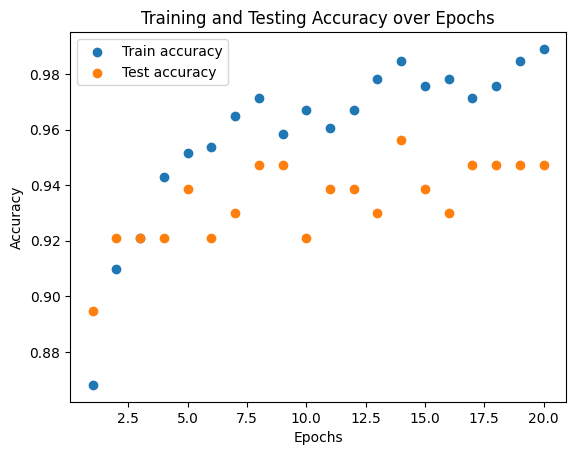

In [ ]:
# Get the list of epochs (x-axis values)
epochs = range(1, len(project.history['accuracy']) + 1)

# Create a scatter plot for training accuracy
plt.scatter(epochs, project.history['accuracy'], label="Train accuracy")

# Create a scatter plot for testing accuracy
plt.scatter(epochs, project.history['val_accuracy'], label="Test accuracy")

# Set plot labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy over Epochs")

# Show the legend
plt.legend()

# Show the plot
plt.show()